<a href="https://colab.research.google.com/github/VitorEmanuelDev/espa04-22_analise_quantitativa_de_modelos_/blob/main/exercicios_trabalho_1_avaliacao_quant_de_modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

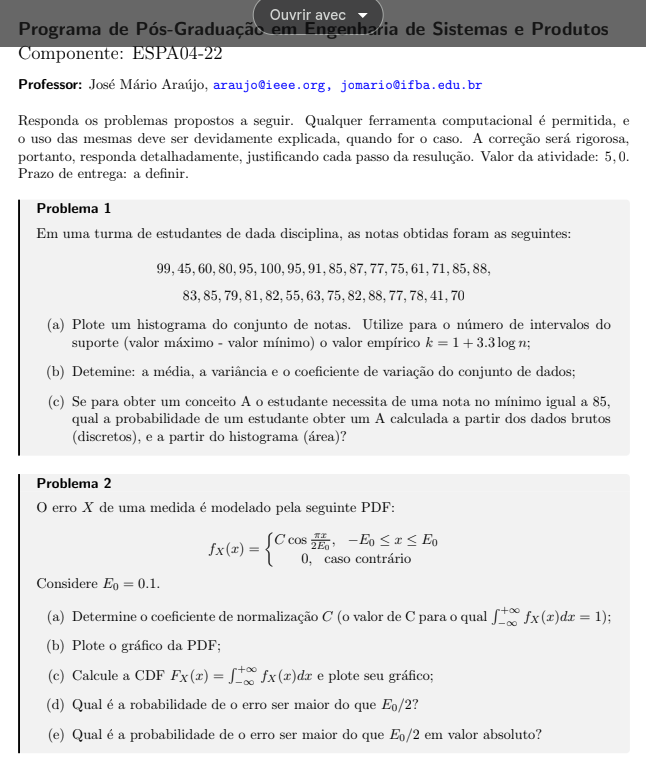

# Problema 1

a)

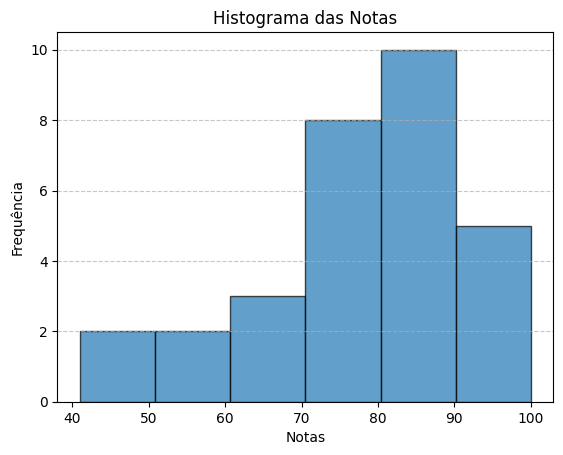

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Array de notas
notas = [99, 45, 60, 80, 95, 100, 95, 91, 85, 87, 77, 75, 61, 71, 85, 88,
         83, 85, 79, 81, 82, 55, 63, 75, 82, 88, 77, 78, 41, 70]

# Cálculo do número de intervalos (k)
n = len(notas)
k = int(np.ceil(1 + 3.3 * np.log10(n)))  # Fórmula empírica para número de intervalos

# Plot do histograma
plt.hist(notas, bins=k, edgecolor='black', alpha=0.7)
plt.title("Histograma das Notas")
plt.xlabel("Notas")
plt.ylabel("Frequência")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [23]:
# Cálculos estatísticos (média, variância, coeficiente de variação)
media = np.mean(notas)
variancia = np.var(notas, ddof=0)  # ddof=0 para população
desvio_padrao = np.sqrt(variancia)
coeficiente_variacao = (desvio_padrao / media) * 100

print("Média: ", round(media, 2), "/ Variância: ", round(variancia, 2), "/ Coeficiente de variação: ", round(coeficiente_variacao, 2))


Média:  77.77 / Variância:  204.25 / Coeficiente de variação:  18.38


c)

In [24]:
# Probabilidade de obter nota >= 85 a partir dos dados brutos
notas_85_acima = [nota for nota in notas if nota >= 85]
probabilidade_bruta = len(notas_85_acima) / n

# Probabilidade aproximada a partir do histograma (área)
contagem, limites = np.histogram(notas, bins=k)
# Identificar o intervalo do histograma que cobre notas >= 85
intervalo_85_acima = [(limites[i], limites[i + 1]) for i in range(len(limites) - 1) if limites[i] >= 85]
# Soma das frequências para os intervalos que cobrem 85 e acima
probabilidade_histograma = sum(
    contagem[i] for i, (lim_inferior, lim_superior) in enumerate(zip(limites[:-1], limites[1:]))
    if lim_inferior >= 85
) / n

print("Probabilidade bruta: ", round(probabilidade_bruta * 100, 2),"%", "/ Probabilidade histograma: ", round(probabilidade_histograma * 100, 2),"%")
print("Esses valores diferem devido à granularidade dos intervalos no histograma")

Probabilidade bruta:  36.67 % / Probabilidade histograma:  16.67 %
Esses valores diferem devido à granularidade dos intervalos no histograma


# Problema 2

a)

In [25]:
from sympy import symbols, integrate, pi, cos, solve, Piecewise, plot

# Variáveis simbólicas para o Problema 2
x = symbols('x')
E0 = 0.1  # Valor fornecido para E0
C = symbols('C')  # Coeficiente de normalização

# Função PDF f_X(x)
f_X = Piecewise(
    (C * cos(pi * x / (2 * E0)), (-E0 <= x) & (x <= E0)),
    (0, True)
)

# Passo (a): Determinar o coeficiente de normalização C
normalizacao = integrate(f_X, (x, -E0, E0)) - 1  # Integral da PDF deve ser igual a 1
C_valor = solve(normalizacao, C)[0]

# Função PDF com o coeficiente calculado
f_X_normalizada = f_X.subs(C, C_valor)

C_valor, f_X_normalizada


(5*pi/2, Piecewise((5*pi*cos(5*pi*x)/2, (x >= -0.1) & (x <= 0.1)), (0, True)))

b)

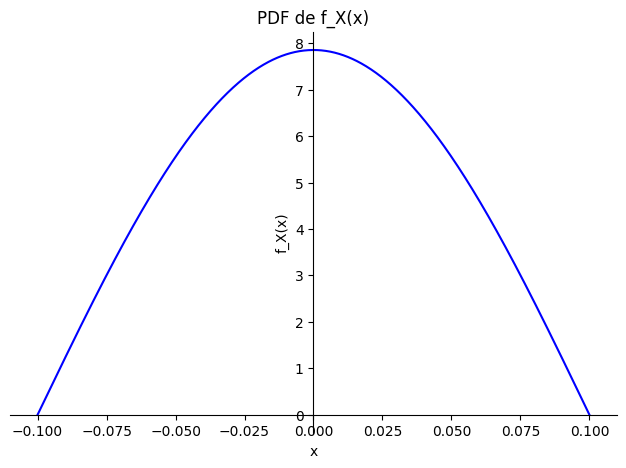

In [27]:
# Reimportar bibliotecas necessárias
from sympy import symbols, integrate, pi, cos, solve, Piecewise, plot

# Redefinir variáveis simbólicas e constantes
x = symbols('x')
E0 = 0.1  # Valor fornecido para E0
C = symbols('C')  # Coeficiente de normalização

# Função PDF f_X(x)
f_X = Piecewise(
    (C * cos(pi * x / (2 * E0)), (-E0 <= x) & (x <= E0)),
    (0, True)
)

# Determinar o coeficiente de normalização C
normalizacao = integrate(f_X, (x, -E0, E0)) - 1  # Integral da PDF deve ser igual a 1
C_valor = solve(normalizacao, C)[0]

# Função PDF com o coeficiente calculado
f_X_normalizada = f_X.subs(C, C_valor)

# Plotar o gráfico da PDF
p = plot(
    f_X_normalizada, (x, -E0, E0),
    title="PDF de f_X(x)",
    ylabel="f_X(x)",
    xlabel="x",
    show=False
)
p[0].line_color = 'blue'
p.show()


c)

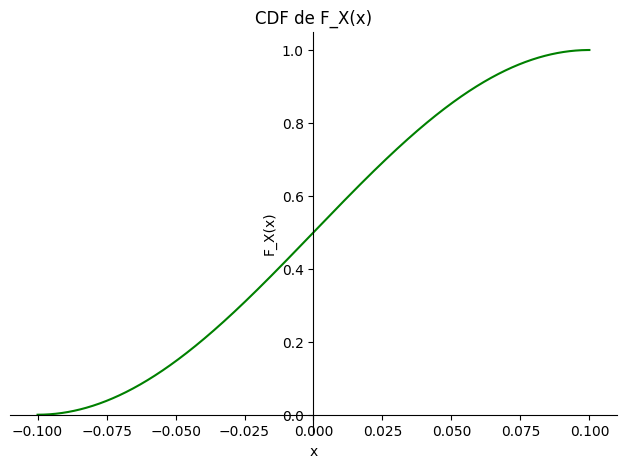

In [28]:
# Calcular a CDF F_X(x) e plotar seu gráfico

# Definir a integral da PDF para calcular a CDF
CDF = integrate(f_X_normalizada, (x, -E0, x))
CDF_func = Piecewise(
    (CDF, x >= -E0),
    (0, x < -E0)
)

# Plotar o gráfico da CDF
p_cdf = plot(
    CDF_func, (x, -E0, E0),
    title="CDF de F_X(x)",
    ylabel="F_X(x)",
    xlabel="x",
    show=False
)
p_cdf[0].line_color = 'green'
p_cdf.show()


d)

In [29]:
# Calcular a probabilidade de o erro ser maior que E0/2

# Probabilidade P(X > E0/2)
P_X_maior_E0_2 = 1 - CDF_func.subs(x, E0 / 2)
print ("Probabilidade do erro > E0/2: ", round(P_X_maior_E0_2.evalf() * 100, 2), "%")


Probabilidade do erro > E0/2:  14.64 %


e)

In [30]:
from scipy.integrate import quad

# Constantes
E0 = 0.1

# Função para a PDF normalizada
def normalized_pdf(x, C, E0=E0):
    return C * np.cos(np.pi * x / (2 * E0))

# Determinar o coeficiente de normalização C
C = np.pi / (2 * E0)

# Limites para a integração
E0_half = E0 / 2

# (d) Probabilidade P(X > E0/2)
prob_X_greater_E0_half, _ = quad(normalized_pdf, E0_half, E0, args=(C, E0))

# (e) Probabilidade P(|X| > E0/2)
prob_abs_X_greater_E0_half = 2 * prob_X_greater_E0_half

print("Probabilidade P(X > E0/2): ", round(prob_X_greater_E0_half * 100, 2),"%", "/ Probabilidade P(|X| > E0/2): ", round(prob_abs_X_greater_E0_half * 100, 2), "%")

Probabilidade P(X > E0/2):  29.29 % / Probabilidade P(|X| > E0/2):  58.58 %
